# 强化学习1：多臂老虎机 (Multi-armed Bandit)

## 强化学习引言 (Reinforcement Learning)

### 学习与强化学习 (Learning and Reinforcement Learning)

- Learning from interaction. 我们是通过与环境互动来学习的。
  - 例如: 婴儿。

- 强化学习（reinforcement learning）：通过计算来（实现）从互动中学习。
  - 目标导向的互动学习 (Goal-directed learning from interaction)

- 怎样做，使回报最大化? 
  - what to so as to maximize a numerical reward.
  
- 两个显著特征：**试错**（trial-and-error）与**延迟回报** (delayed reward)。

In *Sutton*'s words:

The idea that we learn by interacting with our environment is probably the first to occur to us when we think about the nature of learning. Learning from interaction is a foundational idea underlying nearly all theories of learning and intelligence. When an infant plays, waves its arms, or looks about, it has no explicit teacher, but it does have a direct sensorimotor connection to its environment. Exercising this connection produces a wealth of information about cause and effect, about the consequences of actions, and about what to do in order to achieve goals. Throughout our lives, such interactions are undoubtedly a major source of knowledge about our environment and ourselves. Whether we are learning to drive a car or to hold a conversation, we are acutely aware of how our environment responds to what we do, and we seek to influence what happens through our behavior.

- Agent（智能体、个体、本体、代理、学习者、决策者）

- 感知（sensation）、行动（action）、目标（goal）。

- 与监督学习的区别：没有（现成的）数据集。

- 与无监督学习的区别：极大化目标，而非寻找潜在结构。

- 强调探索与利用（explore-exploit）之间的平衡。

- 强调与未知环境（uncertain environment）的互动。

- Time really matters！
  - 时间序列信息；
  - 计算速度


### 强化学习的四要素 (The Four Elements of Reinforcement Learning)

- **策略/政策** (policy)：从（感知到的）状态（state）到 （采取的）行动/动作（action）的映射。

  - 状态 $s$, 行动 $a$
  - 策略 $\pi: s \rightarrow a$
- **回报（奖励）信号**（reward signal）: 行动后收到的即时回报

  - 回报 $r$
- **价值函数**（value function）：状态在未来的总体（长期）回报。即对最终目标的贡献。

- **环境模型** (a model of environment): 模拟/描述环境的行为。

#### Tic-Tac-Toe

当然，我可以帮助你设计一个简单的使用强化学习的 Tic-Tac-Toe（井字棋）AI 代理。强化学习是一种机器学习方法，其中代理通过尝试和错误来学习如何在给定环境中实现最大化的奖励。对于 Tic-Tac-Toe，我们可以使用一种简单的强化学习技术，比如 Q-学习。

以下是一个基本的 Tic-Tac-Toe AI 代理的概念：

1. **环境**：Tic-Tac-Toe 游戏的状态，通常由一个 3x3 的网格表示。

2. **代理**：决定在每个步骤中执行哪个动作（在哪个位置放置标记）的算法。

3. **状态**：当前游戏板的配置。

4. **动作**：在游戏板的空格中放置一个标记。

5. **奖励**：当代理赢得游戏时获得正奖励，输掉游戏时获得负奖励，其他情况奖励为零。

6. **Q-值**：代理学习每个动作在给定状态下的期望回报。

7. **学习过程**：代理通过与环境交互（玩游戏）来更新其 Q-值，学习如何最大化奖励。

在 Python 中实现这个 AI 代理，我们需要：

- 定义 Tic-Tac-Toe 的游戏规则。
- 实现 Q-学习算法。
- 让 AI 通过与自己或随机策略玩家进行游戏来训练。
- 测试 AI 代理的性能。

In [49]:
import numpy as np
import random

class TicTacToe:
    def __init__(self):
        self.board = np.zeros((3, 3), dtype=int)
        self.current_turn = 1

    def reset(self):
        self.board = np.zeros((3, 3), dtype=int)
        self.current_turn = 1

    def is_valid_move(self, x, y):
        return self.board[x, y] == 0

    def make_move(self, x, y):
        if self.is_valid_move(x, y):
            self.board[x, y] = self.current_turn
            self.current_turn = -1 if self.current_turn == 1 else 1
            return True
        return False

    def is_winner(self, player):
        for i in range(3):
            if all(self.board[i, :] == player) or all(self.board[:, i] == player):
                return True
        if self.board[0, 0] == player and self.board[1, 1] == player and self.board[2, 2] == player:
            return True
        if self.board[0, 2] == player and self.board[1, 1] == player and self.board[2, 0] == player:
            return True
        return False

    def is_draw(self):
        return (self.board != 0).all()

class QLearningAgent:
    def __init__(self, learning_rate=0.1, discount_factor=0.95, exploration_rate=1.0, exploration_decay_rate=0.995):
        self.q_table = {}
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.exploration_decay_rate = exploration_decay_rate

    def get_state(self, game):
        return str(game.board.reshape(9))

    def choose_action(self, game):
        state = self.get_state(game)
        if random.uniform(0, 1) < self.exploration_rate:
            return self.random_action(game)
        else:
            return self.best_action(state)

    def random_action(self, game):
        valid_moves = [(i, j) for i in range(3) for j in range(3) if game.is_valid_move(i, j)]
        return random.choice(valid_moves)

    def best_action(self, state):
        if state not in self.q_table:
            return self.random_action(game)
        else:
            return max(self.q_table[state], key=self.q_table[state].get)

    def update_q_table(self, old_state, action, reward, new_state):
        if old_state not in self.q_table:
            self.q_table[old_state] = {}
        if action not in self.q_table[old_state]:
            self.q_table[old_state][action] = 0  # Initialize value

        old_value = self.q_table[old_state][action]
        next_max = max(self.q_table[new_state].values()) if new_state in self.q_table else 0
        new_value = (1 - self.learning_rate) * old_value + self.learning_rate * (reward + self.discount_factor * next_max)
        self.q_table[old_state][action] = new_value

    def decay_exploration_rate(self):
        self.exploration_rate *= self.exploration_decay_rate

def play_game(agent, game):
    game.reset()
    while True:
        state = agent.get_state(game)
        x, y = agent.choose_action(game)
        game.make_move(x, y)

        if game.is_winner(game.current_turn * -1):
            agent.update_q_table(state, (x, y), 1, None)  # Winner gets reward 1
            break
        elif game.is_draw():
            agent.update_q_table(state, (x, y), 0.5, None)  # Draw gets reward 0.5
            break

        new_state = agent.get_state(game)
        agent.update_q_table(state, (x, y), 0, new_state)  # No reward for ongoing game
        agent.decay_exploration_rate()

In [50]:
class RandomAgent:
    def choose_action(self, game):
        # 如果中间位置可用，则优先选择中间
        if game.is_valid_move(1, 1):
            return (1, 1)
        # 否则选择其他随机位置
        valid_moves = [(i, j) for i in range(3) for j in range(3) if game.is_valid_move(i, j)]
        return random.choice(valid_moves)

    def get_state(self, game):
        return None
    
    def update_q_table(self, old_state, action, reward, new_state):
        pass

    def decay_exploration_rate(self):
        pass

def print_board(game, turn_count=None, agent_turn=None):
    if turn_count is not None and agent_turn is not None:
        print(f"Turn {turn_count}, Agent {'QLearning' if agent_turn else 'Random'} is playing:")
    symbols = {0: ' ', 1: 'X', -1: 'O'}
    print('|' + '-' * 11 + '|')
    for row in game.board:
        print('| ' + ' | '.join(symbols[x] for x in row) + ' |')
        print('|' + '-' * 11 + '|')


def print_final_result(game, last_player):
    if game.is_winner(1) or game.is_winner(-1):
        winner = "QLearning Agent" if isinstance(last_player, QLearningAgent) else "Random Agent"
        print(f"Game Over. {winner} wins!")
    else:
        print("Game Over. It's a draw!")
    print_board(game)
    print()

def play_game_2(num, agent1, agent2, game):
    print(f"Game {num}:")
    game.reset()
    turn_count = 1
    last_player = None

    while True:
        agent_turn = turn_count % 2 == 1
        current_player = agent1 if agent_turn else agent2
        last_player = current_player

        state = agent1.get_state(game) if agent_turn else None
        x, y = current_player.choose_action(game)
        game.make_move(x, y)
        print_board(game, turn_count, agent_turn)

        if game.is_winner(game.current_turn * -1):
            print_final_result(game, last_player)
            if agent_turn:
                agent1.update_q_table(state, (x, y), 1, None)  # Winner gets reward 1
            break
        elif game.is_draw():
            print_final_result(game, last_player)
            if agent_turn:
                agent1.update_q_table(state, (x, y), 0.5, None)  # Draw gets reward 0.5
            break

        if agent_turn:
            new_state = agent1.get_state(game)
            agent1.update_q_table(state, (x, y), 0, new_state)  # No reward for ongoing game
            agent1.decay_exploration_rate()

        turn_count += 1

# 初始化游戏和代理
game = TicTacToe()
q_learning_agent = QLearningAgent()

for i in range(1000):
    play_game(q_learning_agent, game)

random_agent = RandomAgent()

# 使用训练过的 QLearningAgent 和改进的随机代理对弈
play_game_2(1, q_learning_agent, random_agent, game)
play_game_2(2, random_agent, q_learning_agent, game)

Game 1:
Turn 1, Agent QLearning is playing:
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
Turn 2, Agent Random is playing:
|-----------|
|   |   |   |
|-----------|
|   | O |   |
|-----------|
|   | X |   |
|-----------|
Turn 3, Agent QLearning is playing:
|-----------|
|   |   | X |
|-----------|
|   | O |   |
|-----------|
|   | X |   |
|-----------|
Turn 4, Agent Random is playing:
|-----------|
|   |   | X |
|-----------|
|   | O |   |
|-----------|
| O | X |   |
|-----------|
Turn 5, Agent QLearning is playing:
|-----------|
|   |   | X |
|-----------|
| X | O |   |
|-----------|
| O | X |   |
|-----------|
Turn 6, Agent Random is playing:
|-----------|
|   |   | X |
|-----------|
| X | O | O |
|-----------|
| O | X |   |
|-----------|
Turn 7, Agent QLearning is playing:
|-----------|
|   |   | X |
|-----------|
| X | O | O |
|-----------|
| O | X | X |
|-----------|
Turn 8, Agent Random is playing:
|-----------|
|   | O | X |
|-

## 多臂老虎机 (Multi-armed Bandit)

- 每次面临着有 $k$ 个选项的选择, 当选择了一个选项（行动） $a$ 后, 将得到回报 $R$, $R$ 的静态分布取决于 $a$, 即 $p(R \mid a)$ 。

- 问题：怎样逐步选择 $N$ 个行动 $A_t(t=1,2, \ldots, N)$, 使获得的总回报 $\sum_{t=1}^N R_t$ 最大。

- 符号理解:
$$
a \Leftrightarrow \mathbf{x}
$$
(更准确地说，代表 $\mathrm{x}$ 的 $k$ 个可能取值的任一个)
$$
\begin{aligned}
A_t & \Leftrightarrow \mathbf{x}_n \\
R_t & \Leftrightarrow t_n
\end{aligned}
$$

- 行动 $a$ 的价值（value）定义为
$$
q_*(a) \doteq \mathbb{E}\left[R_t \mid A_t=a\right]
$$


- 如果 $q_*(a)$ 已知, 则问题很简单, 每步只需要选择 $q_*(a)$最大的 $a$ 。

- 实际上 $q_*(a)$ 末知，在第 $t$ 步做选择时只能根据之前的结果计算估计值 $Q_t(a)$

- **探索 vs. 利用（Exploration and Exploitation）**。

### 行动-价值方法

- 估计行动 $a$ 的价值, 并据之采取行动。
  - 一种估计方法:
    $$
    \begin{aligned}
    & A_i=a \text { 时等于1, 否则0 } \\
    & Q_t(a)=\frac{\sum_{i=1}^{t-1} R_i I\left(A_i=a\right)}{\sum_{i=1}^{t-1} I\left(A_i=a\right)}
    \end{aligned}
    $$
  -或采用贝叶斯方法来估计。 $a$ 无采样点时用缺省值（0或平均值）
  
- 贪心算法 (greedy alogrithm): 函数极大值所对应的参数 $(a)$
$$
A_t=\arg \max _a Q_t(a)
$$
- $\epsilon$-贪心算法: 有小概率 $\epsilon$ 随机选择各种行动。
18

#### $\epsilon$-贪心算法的实现

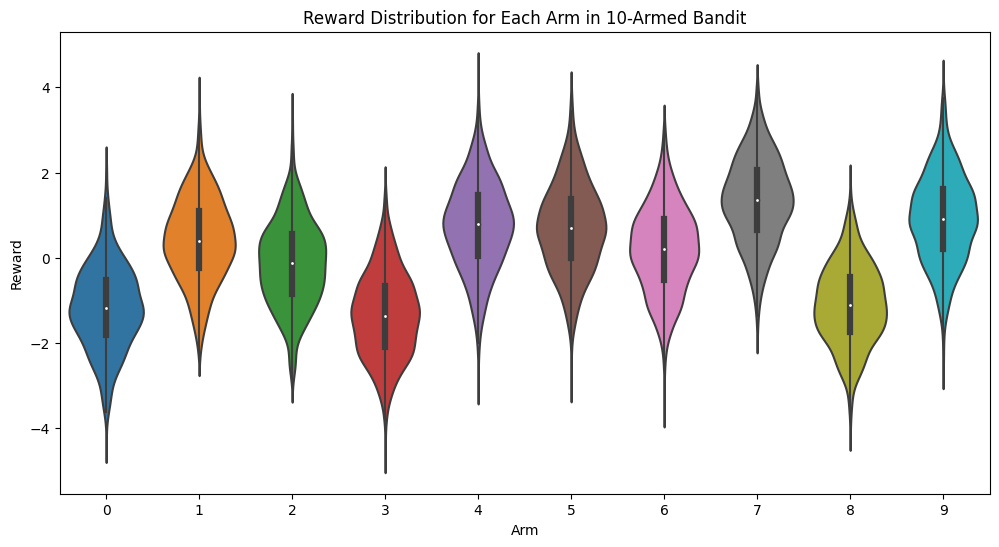

In [51]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

class TenArmedBandit:
    def __init__(self, n_arms=10):
        self.n_arms = n_arms
        self.q_star = np.random.normal(0, 1, n_arms)  # True mean reward for each arm

    def pull_arm(self, arm):
        # Generate a reward for the selected arm
        reward = np.random.normal(self.q_star[arm], 1)
        return reward

# Create a 10-armed bandit
bandit = TenArmedBandit()

# Simulate pulling each arm multiple times to get reward distributions
num_pulls = 1000
rewards = np.zeros((bandit.n_arms, num_pulls))

for arm in range(bandit.n_arms):
    for i in range(num_pulls):
        rewards[arm, i] = bandit.pull_arm(arm)

# Plot violin plots to show reward distribution for each arm
plt.figure(figsize=(12, 6))
sns.violinplot(data=rewards.T)
plt.title("Reward Distribution for Each Arm in 10-Armed Bandit")
plt.xlabel("Arm")
plt.ylabel("Reward")
plt.show()


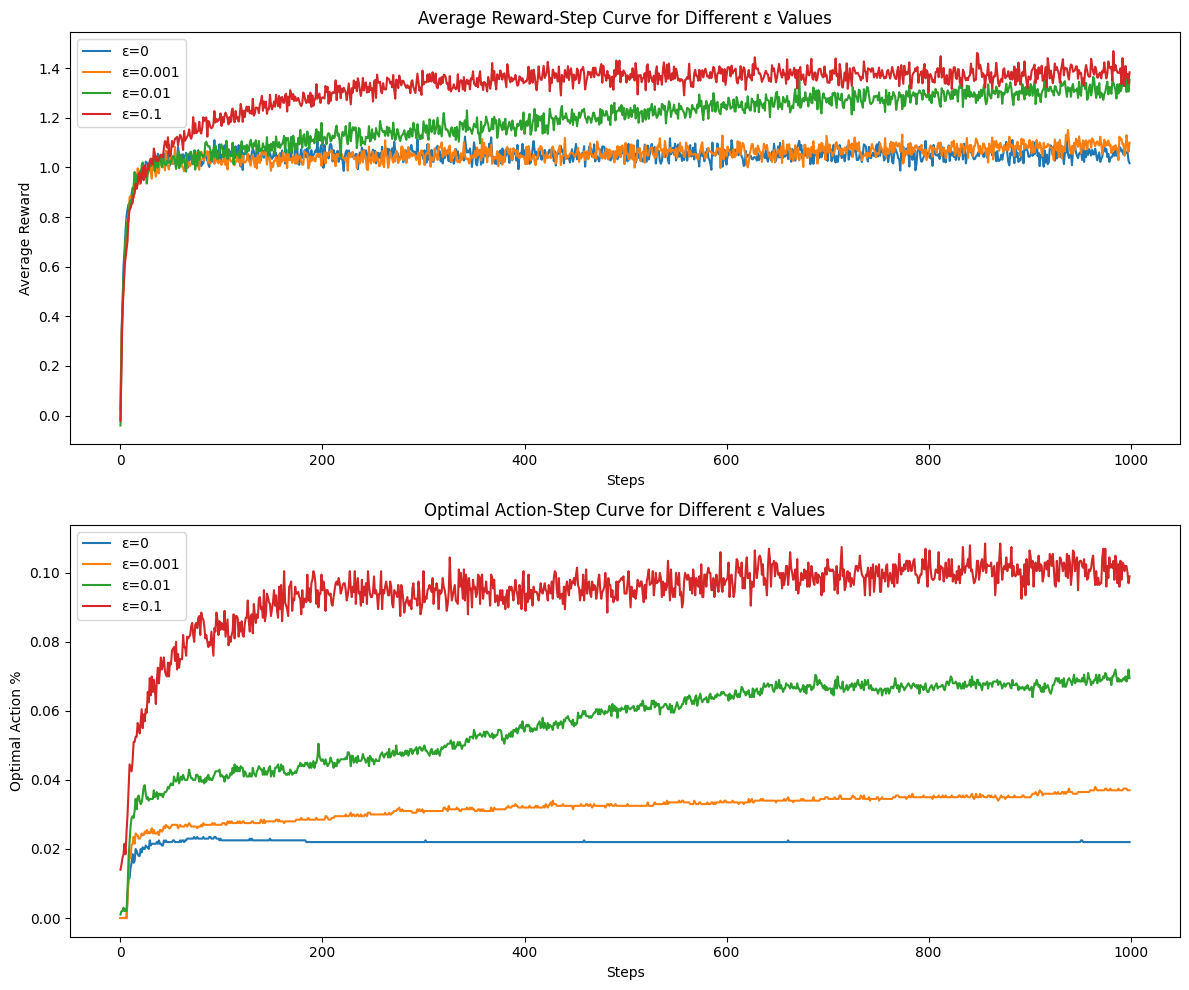

In [52]:
class EpsilonGreedyBandit(TenArmedBandit):
    def __init__(self, n_arms=10):
        super().__init__(n_arms)
        self.q_estimated = np.zeros(n_arms)  # Estimated reward for each arm
        self.arm_counts = np.zeros(n_arms)   # Count of selections for each arm

    def select_arm(self, epsilon):
        if np.random.rand() < epsilon:
            return np.random.randint(self.n_arms)
        else:
            return np.argmax(self.q_estimated)

    def update_estimated(self, arm, reward):
        self.arm_counts[arm] += 1
        self.q_estimated[arm] += (reward - self.q_estimated[arm]) / self.arm_counts[arm]

# Simulation parameters
epsilons = [0, 0.001, 0.01, 0.1]
steps = 1000
runs = 2000  # Number of runs to average results

# Data storage
average_rewards = {eps: np.zeros(steps) for eps in epsilons}
optimal_action_counts = {eps: np.zeros(steps) for eps in epsilons}
optimal_arm = np.argmax(bandit.q_star)

# Run simulation
for epsilon in epsilons:
    for run in range(runs):
        bandit = EpsilonGreedyBandit()
        total_reward = 0

        for step in range(steps):
            arm = bandit.select_arm(epsilon)
            reward = bandit.pull_arm(arm)
            bandit.update_estimated(arm, reward)
            total_reward += reward

            # Update average rewards and optimal action counts
            average_rewards[epsilon][step] += (reward - average_rewards[epsilon][step]) / (run + 1)
            if arm == optimal_arm:
                optimal_action_counts[epsilon][step] += 1 / runs

# Plotting the results
plt.figure(figsize=(12, 10))

# Average Reward-Step curve
plt.subplot(2, 1, 1)
for epsilon, rewards in average_rewards.items():
    plt.plot(rewards, label=f'ε={epsilon}')
plt.title('Average Reward-Step Curve for Different ε Values')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()

# Optimal Action-Step curve
plt.subplot(2, 1, 2)
for epsilon, counts in optimal_action_counts.items():
    plt.plot(counts, label=f'ε={epsilon}')
plt.title('Optimal Action-Step Curve for Different ε Values')
plt.xlabel('Steps')
plt.ylabel('Optimal Action %')
plt.legend()

plt.tight_layout()
plt.show()

### 在线学习（增量式实现，Incremental Implementation）

- 假设某个行动 $a$ 被采纳了 $n$ 次, 其价值函数的新的估计值是
$$
\begin{aligned}
& Q_{n+1}=\frac{1}{n} \sum_{i=1}^n R_i=\frac{1}{n}\left(R_n+\sum_{i=1}^{n-1} R_i\right)=\frac{1}{n}\left(R_n+\frac{n-1}{n-1} \sum_{i=1}^{n-1} R_i\right)= \\
& =\frac{1}{n}\left(R_n+(n-1) Q_n\right)=Q_n+\frac{1}{n}\left(R_n-Q_n\right)
\end{aligned}
$$

- 因此
  $$
  Q_{n+1}=Q_n+\eta\left(R_n-Q_n\right)
  $$

  - 此处学习率
$$
\eta=\frac{1}{n}
$$

### 非静态分布

- 如果 $p(R \mid a)$ 随时间变化, 合理的做法是给更近的样本赋予更大的权重。

- 例如, 将 $\eta$ 设为常数:
$$
\begin{aligned}
Q_{n+1} & =Q_n+\eta\left(R_n-Q_n\right)=\eta R_n+(1-\eta) Q_n \\
& =\eta R_n+(1-\eta)\left[\eta R_{n-1}+(1-\eta) Q_{n-1}\right] \\
& =\cdots=(1-\eta)^n Q_1+\sum_{i=1}^n \eta(1-\eta)^{n-i} R_i
\end{aligned}
$$

这是一种指数近因加权平均 （exponential recencyweighted average）。

### UCB 算法

- Upper-Confidence-Bound (UCB) $Q_t(a)$ 是对 $q_*(a)$ 的估计。

- 对 $a$ 的采样样本越多, 估计越准确,变化范围（误差）与 $\sqrt{1 / N_t(a)}$ 成正比。
    $$
    \bar{x} \approx \frac{\sum_{i=1}^n x_i}{n} \pm \frac{1}{\sqrt{n}} \sqrt{\frac{\sum_{i=1}^n\left[x_i-\left(\dfrac{\sum_{j=1}^n x_j^1}{n}\right)\right]^2}{n-1}}
    $$
    - $\bar{x}$: 真实平均值
    - $\dfrac{\sum_{j=1}^n x_j^1}{n}$: 测量平均值
    - $\dfrac{1}{\sqrt{n}} \sqrt{\dfrac{\sum_{i=1}^n\left[x_i-\left(\dfrac{\sum_{j=1}^n x_j^1}{n}\right)\right]^2}{n-1}}$: 测量方差（误差）


- 基于面对不确定性时的乐观原则，以期望值置信区间上界为选择行动的标准, 一种UCB算法是（过程复杂, 略）:
$$
A_t=\arg \max _a\left[Q_t(a)+c \sqrt{\frac{\ln t}{N_t(a)}}\right]
$$




## Toolkits of Reinforcement Learning

在强化学习领域，"toolkit"通常指的是一组专门设计的工具和库，它们用于设计、实现、测试和优化强化学习算法。这些工具集提供了开发和研究强化学习模型所需的基本构建块，从而加速了新方法的开发和现有方法的改进。以下是强化学习中一些常用工具包的应用概述：

1. **OpenAI Gym**: OpenAI Gym 是最流行的强化学习工具集之一。它提供了一个标准化的环境集合，用于开发和比较强化学习算法。这些环境涵盖从经典控制问题到视频游戏的广泛范围，为研究人员提供了一个共同的基准。

2. **Stable Baselines**: Stable Baselines 是一个建立在 OpenAI Gym 之上的库，提供了一系列预先实现的强化学习算法。这些算法包括了从基本的 Q-Learning 到更复杂的深度强化学习方法，如 DQN、A3C 和 PPO。

3. **RLlib**: RLlib 是 Ray 框架的一部分，是一个用于强化学习的可扩展库。它支持多种强化学习算法，并且可以在单机或分布式环境中运行，非常适合于大规模的强化学习任务。

4. **TensorFlow Agents**: TensorFlow Agents (TF-Agents) 是一个基于 TensorFlow 的库，它提供了多种强化学习算法的实现，包括DQN、DDPG 和 TD3。TF-Agents 强调易用性和可扩展性，适合于那些已经熟悉 TensorFlow 的研究人员和开发者。

5. **PyTorch Reinforcement Learning (PyTorch-RL)**: 这是一个基于 PyTorch 的库，提供了多种标准强化学习算法的实现。它的设计哲学是灵活和模块化，使得它容易适应新的研究需求。

这些工具包在强化学习研究和应用中的主要优势包括：

- **快速原型开发**：这些工具提供了标准化的环境和算法实现，加快了从理念到实验的过程。
- **比较和基准测试**：它们提供的标准环境使得不同算法之间的性能比较变得容易和公平。
- **易于实验和迭代**：这些工具集的模块化和灵活性使得修改现有算法或实验新算法变得简单。
- **适用于教育和研究**：这些工具集为学生和研究人员提供了学习和探索强化学习的理想平台。

综上所述，这些工具包在强化学习的发展和应用中起着关键作用，它们不仅加速了新算法的研发，也促进了现有算法的优化和应用。

### OpenAI Gym

OpenAI Gym 是强化学习研究和应用中最著名和广泛使用的工具之一。它提供了一个标准化、易于使用的环境集合，使研究人员和开发者能够开发、比较和测试各种强化学习算法。下面我将详细介绍 OpenAI Gym 在强化学习中的应用，包括其环境、特点和如何使用它来训练一个模型。

#### 环境

1. **经典控制问题**：这些是基本的物理控制任务，如倒立摆（CartPole）、山地车（MountainCar）和双联摆（Acrobot）。这些任务通常用于测试和比较基本的强化学习算法。

2. **Atari 游戏**：通过集成 Atari Learning Environment（ALE），OpenAI Gym 提供了一系列经典 Atari 视频游戏（如 Breakout、Pong、Space Invaders），作为强化学习算法的测试平台。

3. **机器人仿真**：例如使用 MuJoCo 和 PyBullet 等物理引擎的环境，这些高度逼真的仿真环境用于测试更复杂的、需要连续动作空间的强化学习算法。

4. **自定义环境**：用户还可以创建自定义环境，以测试特定的场景或算法。

#### 特点

- **标准化接口**：所有环境都有一个共同的接口，包括方法如 `reset()`（重置环境）、`step()`（执行动作并获取新的状态和奖励）等。
  
- **多样性**：提供了从简单到复杂、从经典控制到复杂游戏和仿真的多样环境。

- **基准测试**：标准化的环境使得不同强化学习算法之间的性能可以公平地比较。

#### 使用示例

假设我们要使用 OpenAI Gym 训练一个强化学习模型来解决倒立摆（CartPole）问题。以下是基本步骤：

#### 结论

OpenAI Gym 是一个强大的工具，它提供了一个标准化、多样化的环境集合，适用于从入门级到高级的强化学习研究和应用。它的易用性和灵活性使其成为研究人员和开发者进行算法实验和比较的理想选择。通过这种方式，OpenAI Gym 极大

地推动了强化学习领域的发展和创新。

In [53]:
%pip install gym

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


### Stable Baselines

Stable Baselines 是一个开源的强化学习库，它基于 OpenAI Gym 提供了各种经典和现代强化学习算法的实现。这个库的目标是提供高质量、易于使用和扩展的实现，帮助研究人员和开发人员快速构建和测试强化学习模型。下面我将详细介绍 Stable Baselines 在强化学习中的应用，包括其特点、提供的算法和一个使用示例。

#### 特点

1. **广泛的算法支持**：Stable Baselines 提供了多种深度强化学习算法的实现，包括 A2C、ACER、ACKTR、DQN、DDPG、GAIL、HER、PPO、SAC、TD3 和 TRPO。

2. **易于使用**：提供了简单的 API 来创建、训练和评估模型。这使得研究人员和开发者能够快速实现和测试新的想法。

3. **可定制和扩展**：由于其模块化的设计，Stable Baselines 很容易进行定制和扩展，以适应不同的研究和开发需求。

4. **与 OpenAI Gym 兼容**：可以直接在 OpenAI Gym 环境中使用 Stable Baselines。

#### 提供的算法

- **值基方法**：如 DQN（Deep Q-Networks）、TD3（Twin Delayed DDPG）等。
- **策略梯度方法**：如 A2C（Advantage Actor-Critic）、PPO（Proximal Policy Optimization）等。
- **确定性策略梯度方法**：如 DDPG（Deep Deterministic Policy Gradient）、SAC（Soft Actor-Critic）等。

#### 使用示例

假设我们要使用 Stable Baselines 和 OpenAI Gym 解决倒立摆（CartPole）问题。以下是基本步骤：

1. **安装 Stable Baselines**:
   ```shell
   pip install stable-baselines3
   ```

2. **导入库和创建环境**:
   ```python
   import gym
   from stable_baselines3 import PPO

   env = gym.make('CartPole-v1')
   ```

3. **创建模型**:
   使用 Stable Baselines 提供的 PPO 算法创建一个模型。
   ```python
   model = PPO('MlpPolicy', env, verbose=1)
   ```

4. **训练模型**:
   训练模型以学习最优策略。
   ```python
   model.learn(total_timesteps=10000)
   ```

5. **测试模型**:
   使用训练好的模型在环境中运行。
   ```python
   obs = env.reset()
   for i in range(1000):
       action, _states = model.predict(obs, deterministic=True)
       obs, rewards, dones, info = env.step(action)
       env.render()
   ```

6. **保存和加载模型**:
   可以保存训练好的模型，并在需要时重新加载。
   ```python
   model.save("ppo_cartpole")
   model = PPO.load("ppo_cartpole")
   ```

#### 结论

Stable Baselines 提供了强化学习研究和实践中一个重要的工具集。它简化了复杂算法的实现和试验过程，使得研究人员和开发者能够专注于算法的设计和优化，而不是底层实现的细节。通过这种方式，Stable Baselines 促进了强化学习领域的发展和应用的普及。

In [55]:
%conda install -c conda-forge gym-all

Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1006)'))': /anaconda/cloud/pytorch/noarch/repodata.json

Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1006)'))': /anaconda/cloud/pytorch/noarch/repodata.json

Retrying (Retry(total=0, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1006)'))': /anaconda/cloud/pytorch/noarch/repodata.json

Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProxyError('Cannot connect to proxy.', NewConnectionError('<urllib3.connection.H

Channels:
 - conda-forge
 - defaults
 - pytorch
 - rdkit
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [56]:
%pip install stable-baselines3

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


了解，我将提供一个更复杂的强化学习示例，使用 Stable Baselines 库和 OpenAI Gym，将代码块合并为一个完整的示例。在这个示例中，我们将使用一个更复杂的环境（例如 "LunarLander-v2"），这是一个需要控制着陆器在月球表面安全着陆的任务。我们将使用 PPO（Proximal Policy Optimization）算法，它是一种高效的策略梯度方法。此外，我还将添加一些代码来可视化训练过程和测试结果。

以下是实现步骤：

1. **环境设置**：选择 "LunarLander-v2" 环境。
2. **创建模型**：使用 PPO 算法创建模型。
3. **训练模型**：在选定的环境中训练模型。
4. **可视化训练**：记录训练过程中的一些关键指标，如奖励。
5. **测试模型**：在环境中测试训练好的模型，并可视化测试过程。

现在，我将编写并展示这个完整的代码示例。

由于当前环境中没有安装 `gym` 和 `stable_baselines3` 库，无法直接运行这个代码。但是，您可以在您的本地环境中运行它。下面是您应该执行的步骤：

1. **安装必要的库**：
   首先，您需要在您的 Python 环境中安装 `gym` 和 `stable_baselines3`。您可以使用 pip 进行安装：
   ```bash
   pip install gym stable-baselines3
   ```

2. **运行上面的代码**：
   然后，您可以将上面的代码复制到您的 Python 环境中运行。这个代码将完成以下任务：
   - 创建一个 "LunarLander-v2" 环境。
   - 使用 PPO 算法创建和训练一个模型。
   - 训练模型，并在训练过程中记录奖励。
   - 在图表中可视化训练过程中的奖励。
   - 测试模型并在环境中进行演示。

3. **观察结果**：
   您将看到训练过程中每个回合的奖励变化图，以及训练后的模型在 "LunarLander-v2" 环境中的表现。

请注意，强化学习的训练过程可能需要一定的计算资源和时间，具体取决于您的系统配置和所选环境的复杂性。

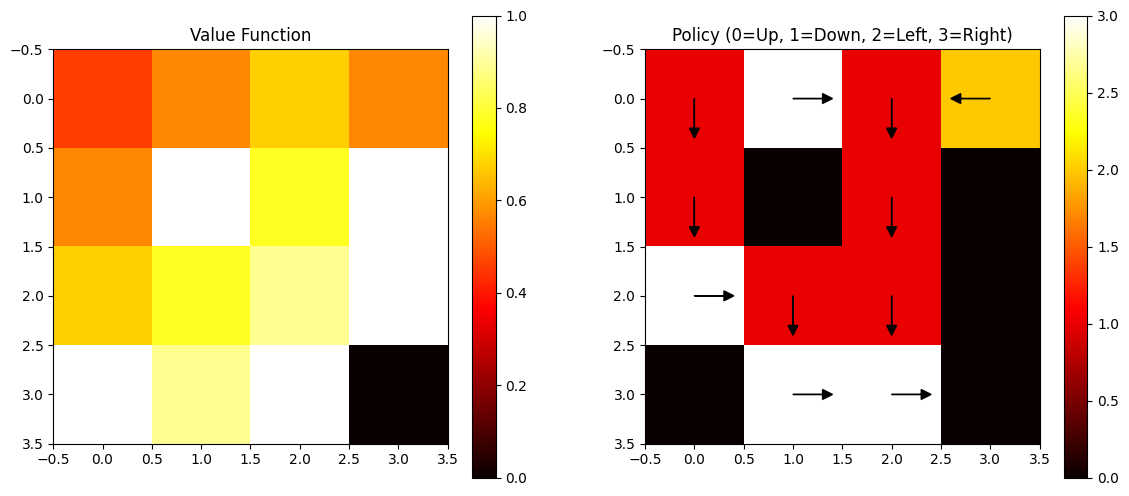

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def value_iteration(states, actions, transition_probabilities, rewards, gamma, threshold):
    V = np.zeros(len(states))
    policy = np.zeros(len(states), dtype=int)
    while True:
        V_prev = np.copy(V)
        for s in states:
            V[s] = max([sum([transition_probabilities[s][a][s_next] * (rewards[s][a][s_next] + gamma * V_prev[s_next]) 
                            for s_next in states]) for a in actions])
        if np.max(np.abs(V - V_prev)) < threshold:
            break
    for s in states:
        policy[s] = np.argmax([sum([transition_probabilities[s][a][s_next] * (rewards[s][a][s_next] + gamma * V_prev[s_next]) 
                            for s_next in states]) for a in actions])
    return V, policy

# 定义网格世界的参数
states = np.arange(16)  # 4x4 网格
actions = [0, 1, 2, 3]  # 上、下、左、右
gamma = 0.99  # 折扣因子
threshold = 0.001  # 收敛阈值
goal_state = 15  # 目标状态
obstacles = [5, 7, 11, 12]  # 障碍物位置

# 初始化奖励和转移概率
rewards = np.full((16, 4, 16), -0.1)  # 默认奖励
transition_probabilities = np.zeros((16, 4, 16))  # 转移概率

# 填充转移概率和奖励
for s in states:
    if s in obstacles or s == goal_state:
        continue
    for a in actions:
        next_state = s
        if a == 0 and s >= 4:  # 上
            next_state = s - 4
        elif a == 1 and s < 12:  # 下
            next_state = s + 4
        elif a == 2 and s % 4 > 0:  # 左
            next_state = s - 1
        elif a == 3 and s % 4 < 3:  # 右
            next_state = s + 1

        if next_state in obstacles:
            next_state = s  # 如果下一个状态是障碍物，保持原地

        transition_probabilities[s][a][next_state] = 1

# 设置目标状态的奖励
rewards[:, :, goal_state] = 1

# 执行价值迭代
V, policy = value_iteration(states, actions, transition_probabilities, rewards, gamma, threshold)

# 可视化价值函数和策略
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
V_grid = V.reshape(4,4)
for obs in obstacles:
    V_grid[obs // 4, obs % 4] = None  # 将障碍物位置置为空
plt.imshow(V_grid, cmap='hot', interpolation='nearest')
plt.title('Value Function')
plt.colorbar()

plt.subplot(1, 2, 2)
policy_grid = policy.reshape(4,4)
for obs in obstacles:
    V_grid[obs // 4, obs % 4] = None  # 将障碍物位置置为空
plt.imshow(policy_grid, cmap='hot', interpolation='nearest')
plt.title('Policy (0=Up, 1=Down, 2=Left, 3=Right)')
plt.colorbar()

# 在策略图上添加箭头表示动作方向
# 在策略图上添加箭头表示动作方向
for y in range(4):
    for x in range(4):
        pos = 4 * y + x
        if pos in obstacles or pos == goal_state:
            continue
        action = policy[pos]
        if action == 0:  # 上
            plt.arrow(x, y, 0, -0.3, head_width=0.1, head_length=0.1, fc='k', ec='k')
        elif action == 1:  # 下
            plt.arrow(x, y, 0, 0.3, head_width=0.1, head_length=0.1, fc='k', ec='k')
        elif action == 2:  # 左
            plt.arrow(x, y, -0.3, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')
        elif action == 3:  # 右
            plt.arrow(x, y, 0.3, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')

plt.show()
